![](https://fenc.wang/imgs/2020/08/3565654bfbe9ffa0.png)

In [42]:
import tushare as ts
import pandas as pd
# 导入绘图工具
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  
#设置完整显示数据
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:,.2f}'.format)

pro = ts.pro_api('xxxxxxxxxxxxxxxxxxxxxxxxxxxx')

In [43]:
#股票池
stock_list = ['中材科技']

In [44]:
stock_basic = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name')
stock_selections = stock_basic[stock_basic['name'].isin(stock_list)]

#先建立一个字典，用来存储指数对应的PE
all_data = {} 

#遍历index_list里面的指数，我上面只选取了两个
for ts_code, name in zip(stock_selections['ts_code'], stock_selections['name']):
    index_data = pro.daily_basic(ts_code=ts_code,fields='ts_code,trade_date,pe,pb,ps,ps_ttm,pe_ttm')
    index_data['trade_date'] = pd.to_datetime(index_data['trade_date'], format='%Y%m%d')
    index_data.set_index('trade_date', inplace=True)
    all_data[name]= index_data


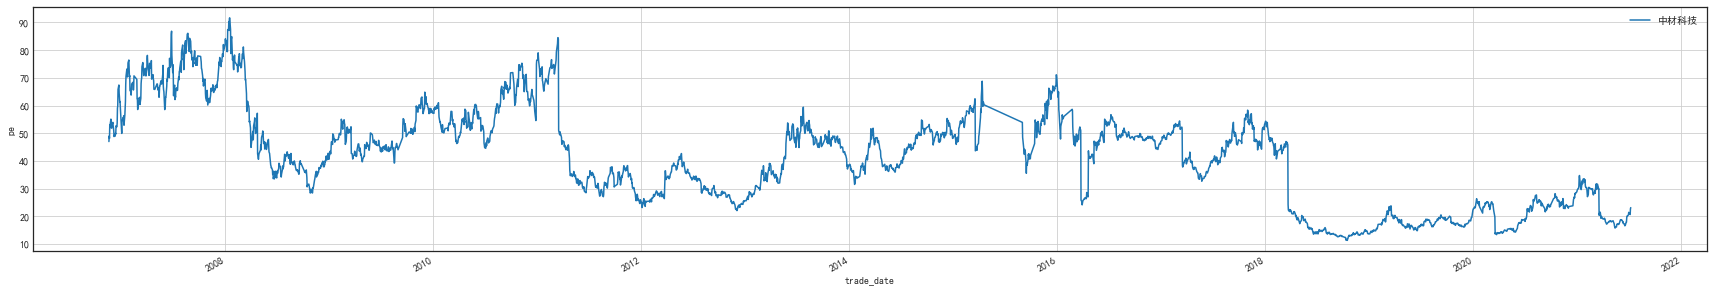

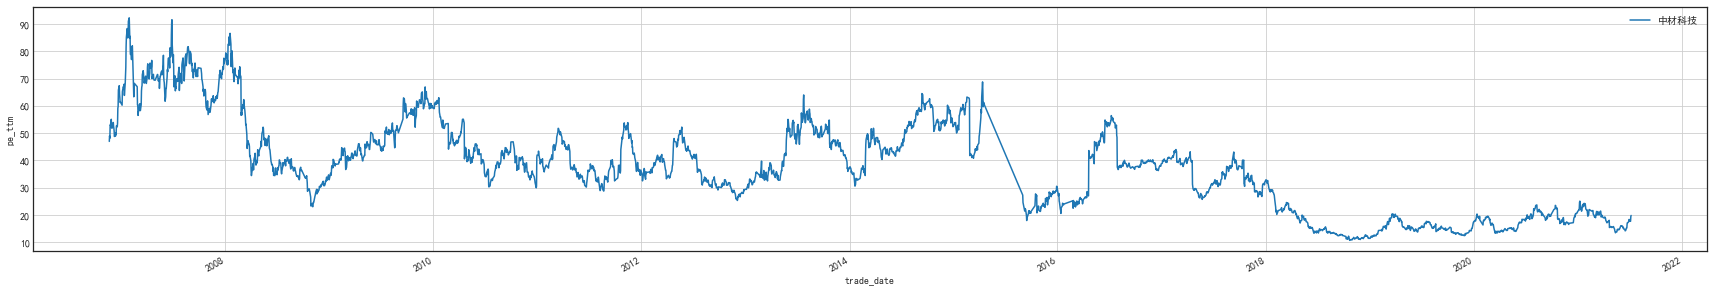

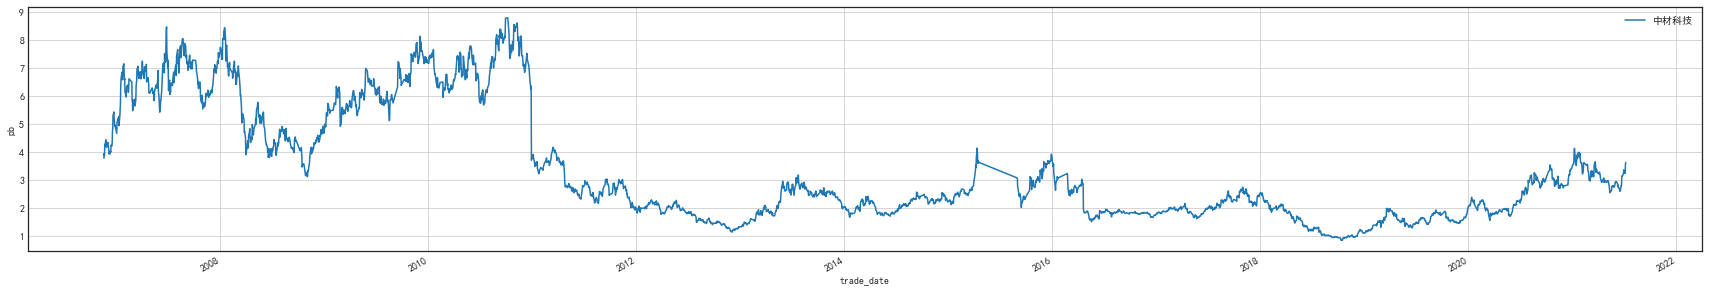

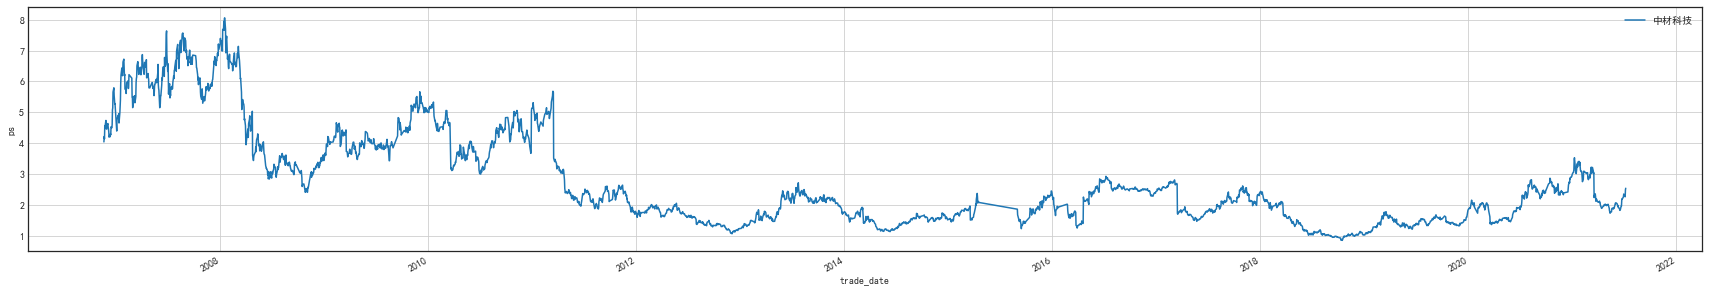

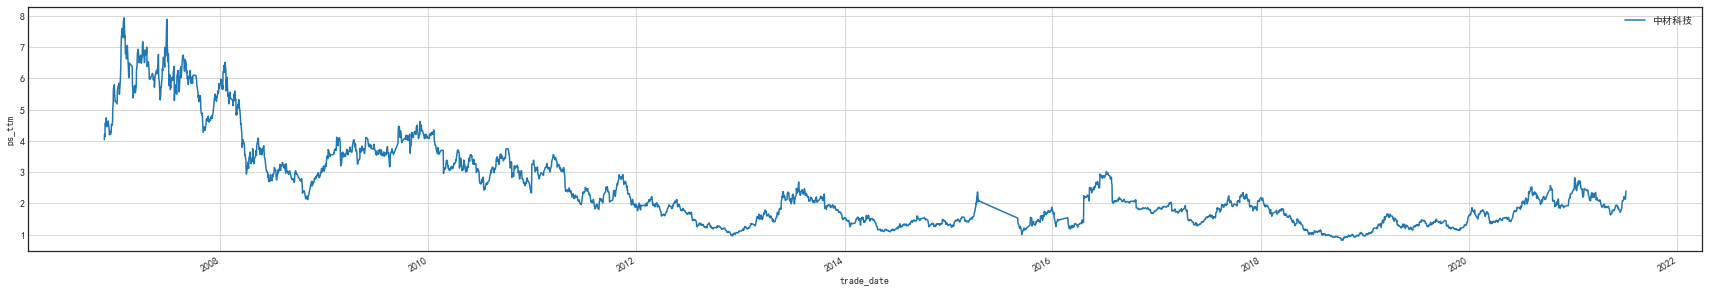

In [45]:
inds = ['pe','pe_ttm','pb','ps','ps_ttm']

for ind in inds:
    #用for循环遍历指数的PE并转换为dataframe的形式
    _data = pd.DataFrame({tic: data[ind]
                        for tic, data in all_data.items()})
    fig, ax = plt.subplots(1, 1, figsize=(30, 10))
    ax.set_ylabel(ind)
    _data[stock_list].plot(ax=ax, grid=True, figsize=(30, 5))
    


![](https://fenc.wang/imgs/2020/08/3565654bfbe9ffa0.png)